In [1]:
from data_functions import get_ant_datafiles_info, preprocess_antcolony_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ant_data = get_ant_datafiles_info()
data_indoor = pd.DataFrame()
data_outdoor = pd.DataFrame()

for i in range(0,4):
    pre_data = preprocess_antcolony_data(ant_data['file'][i])
    data_indoor = pd.concat([data_indoor,pre_data])

for i in range(5,9):
    pre_data = preprocess_antcolony_data(ant_data['file'][i])
    data_outdoor = pd.concat([data_outdoor,pre_data])

test_indoor = preprocess_antcolony_data(ant_data['file'][4])
test_outdoor = preprocess_antcolony_data(ant_data['file'][9])

data_indoor = data_indoor.dropna()
data_outdoor = data_outdoor.dropna()

test_indoor = test_indoor.dropna()
test_outdoor = test_outdoor.dropna()

data_indoor['location'] = "indoor"
data_outdoor['location'] = "outdoor"

test_indoor["location"] = "indoor"
test_outdoor["location"] = "outdoor"

full_data = pd.concat([data_indoor,data_outdoor])
test_data = pd.concat([test_indoor, test_outdoor])

# shuffle data
full_data = full_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

# sample from full data and test data equally for "indoor" and "outdoor" (balance classes)
max_len_train = min(len(full_data[full_data["location"] == "indoor"]), len(full_data[full_data["location"] == "outdoor"]))
max_len_test = min(len(test_data[test_data["location"] == "indoor"]), len(test_data[test_data["location"] == "outdoor"]))
full_data = pd.concat([full_data[full_data["location"] == "indoor"].sample(n=max_len_train), full_data[full_data["location"] == "outdoor"].sample(n=max_len_train)])
test_data = pd.concat([test_data[test_data["location"] == "indoor"].sample(n=max_len_test), test_data[test_data["location"] == "outdoor"].sample(n=max_len_test)])

# don't use "speed", because the indoor vs outdoor camera fps is different 
X_train = full_data[["cos(angle)"]]
y_train = full_data["location"]

X_test = test_data[["cos(angle)"]]
y_test = test_data["location"]

Accuracy: 76.16811458088753


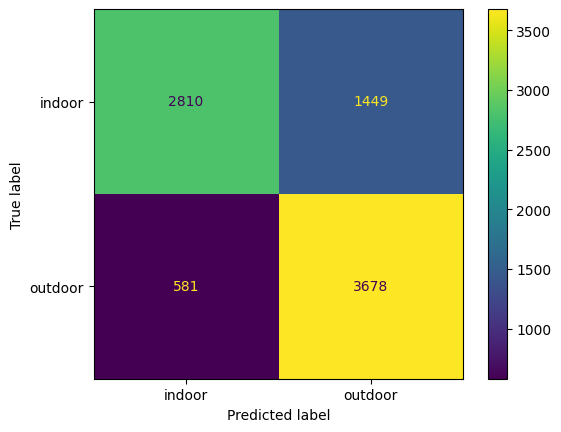

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test, y_pred, labels= ["indoor", "outdoor"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["indoor", "outdoor"])
disp.plot()
plt.show()

Accuracy: 76.15637473585349


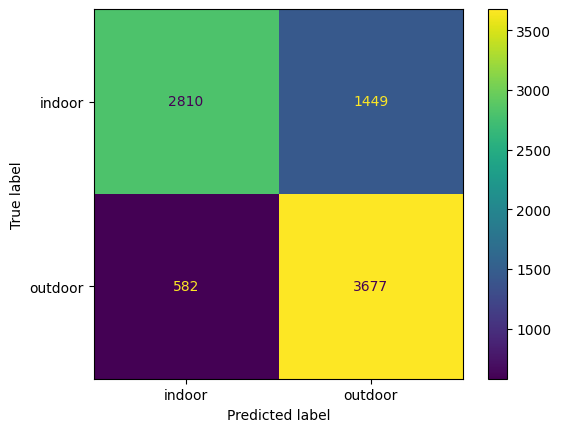

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

cm = confusion_matrix(y_test,y_pred, labels= ["indoor", "outdoor"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["indoor", "outdoor"])
disp.plot()
plt.show()

Accuracy: 0.5437896219769899


<Figure size 1000x1000 with 0 Axes>

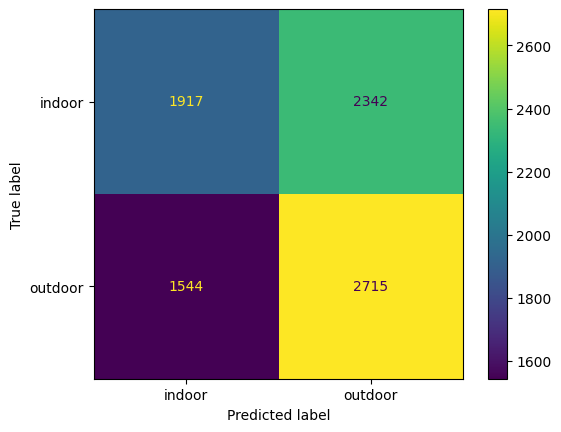

In [6]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(max_iter=1000)
m.fit(X_train,y_train)

y_pred = m.predict(X_test)

plt.figure(figsize=(10,10))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test,y_pred, labels= ["indoor", "outdoor"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["indoor", "outdoor"])
disp.plot()
plt.show()